<a href="https://colab.research.google.com/github/techonair/Machine-Learing-A-Z/blob/main/Classifiers/Kernal_SVM/Kernal_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kernal** Support Vector Machine

## Importing Libraires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [2]:
from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'Age,EstimatedSalary,Purchased\r\n19,19000,0\r\n35,20000,0\r\n26,43000,0\r\n27,57000,0\r\n19,76000,0\r\n27,58000,0\r\n27,84000,0\r\n32,150000,1\r\n25,33000,0\r\n35,65000,0\r\n26,80000,0\r\n26,52000,0\r\n20,86000,0\r\n32,18000,0\r\n18,82000,0\r\n29,80000,0\r\n47,25000,1\r\n45,26000,1\r\n46,28000,1\r\n48,29000,1\r\n45,22000,1\r\n47,49000,1\r\n48,41000,1\r\n45,22000,1\r\n46,23000,1\r\n47,20000,1\r\n49,28000,1\r\n47,30000,1\r\n29,43000,0\r\n31,18000,0\r\n31,74000,0\r\n27,137000,1\r\n21,16000,0\r\n28,44000,0\r\n27,90000,0\r\n35,27000,0\r\n33,28000,0\r\n30,49000,0\r\n26,72000,0\r\n27,31000,0\r\n27,17000,0\r\n33,51000,0\r\n35,108000,0\r\n30,15000,0\r\n28,84000,0\r\n23,20000,0\r\n25,79000,0\r\n27,54000,0\r\n30,135000,1\r\n31,89000,0\r\n24,32000,0\r\n18,44000,0\r\n29,83000,0\r\n35,23000,0\r\n27,58000,0\r\n24,55000,0\r\n23,48000,0\r\n28,79000,0\r\n22,18000,0\r\n32,117000,0\r\n27,20000,0\r\n25,87000,0\r\n23,66000,0\r\n32,120000,1\r\n59,83000,0\r\n24,58000,0\r\n24,19000

## Splitting Dataset into X & Y

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[: , :-1].values
Y = dataset.iloc[: , -1].values

## Splitting Dataset into Training & Test Set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Feature Scaling 

In [5]:
from sklearn.preprocessing import StandardScaler
feat_scale = StandardScaler()
X_train = feat_scale.fit_transform(X_train)
X_test = feat_scale.transform(X_test)

## Training the SVM model on Training Set

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state= 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test Set Result

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


[[64  4]
 [ 3 29]]
0.93


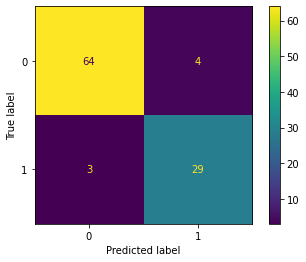

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
confusionMatrix = confusion_matrix(Y_test,y_pred)
dis = ConfusionMatrixDisplay(confusionMatrix, display_labels=classifier.classes_)
print(confusionMatrix)
print(accuracy_score(Y_test, y_pred))

dis.plot()
plt.show()


## Visulization of Training Set Result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


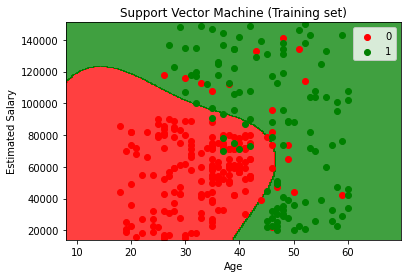

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = feat_scale.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(feat_scale.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visulization of Test Set Result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


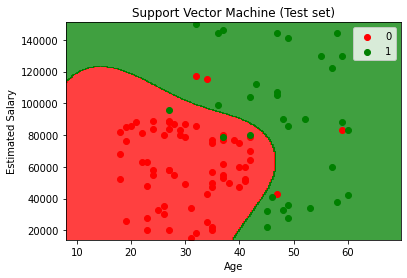

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = feat_scale.inverse_transform(X_test), Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(feat_scale.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()